In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium
import geopandas as gpd

In [ ]:
# Shapefile 읽기
shapefile_path = '/content/drive/MyDrive/유성구 데이터/법정동인구수경계/bnd_oa_25040_2023_2Q.shp'
gdf = gpd.read_file(shapefile_path)

# 좌표계 확인
print(gdf.crs)

# 좌표계가 EPSG:4326이 아니라면 변환
if gdf.crs != 'EPSG:4326':
    gdf = gdf.to_crs('EPSG:4326')

PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 2000",DATUM["Geocentric_datum_of_Korea",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],TOWGS84[0,0,0,0,0,0,0],AUTHORITY["EPSG","6737"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4737"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",38],PARAMETER["central_meridian",127.5],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",1000000],PARAMETER["false_northing",2000000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","5179"]]


In [ ]:
jangdae_gdf = gdf[gdf['ADM_CD']=='25040540']

In [ ]:
jangdae_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)

<ipython-input-6-2a9c1dcbb0df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jangdae_gdf.rename(columns={'TOT_REG_CD': '집계구번호'}, inplace=True)


In [ ]:
jangdae_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry
5,20230701,25040540,25040540080102,"POLYGON ((127.33323 36.37004, 127.33322 36.369..."
6,20230701,25040540,25040540080103,"POLYGON ((127.33482 36.37079, 127.33473 36.370..."
7,20230701,25040540,25040540080301,"POLYGON ((127.34016 36.37406, 127.33994 36.373..."
8,20230701,25040540,25040540090510,"POLYGON ((127.35795 36.36560, 127.35827 36.365..."
14,20230701,25040540,25040540010001,"POLYGON ((127.33125 36.36781, 127.33122 36.367..."
...,...,...,...,...
99,20230701,25040540,25040540090501,"POLYGON ((127.35400 36.36379, 127.35300 36.363..."
100,20230701,25040540,25040540090502,"POLYGON ((127.35539 36.36277, 127.35537 36.362..."
101,20230701,25040540,25040540090505,"POLYGON ((127.35511 36.36524, 127.35436 36.365..."
102,20230701,25040540,25040540090504,"POLYGON ((127.35579 36.36434, 127.35552 36.364..."


In [ ]:
jangdae_gdf.dropna(inplace=True)

<ipython-input-8-18dd06eb26d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jangdae_gdf.dropna(inplace=True)


In [ ]:
jangdae_gdf['집계구번호'] = jangdae_gdf['집계구번호'].astype(int)

/usr/local/lib/python3.10/dist-packages/geopandas/geodataframe.py:1528: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [ ]:
jangdae_df = pd.read_excel('/content/drive/MyDrive/유성구 데이터/장대동_인구수.xls')
jangdae_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   순위      89 non-null     int64  
 1   항목      89 non-null     object 
 2   집계구번호   89 non-null     int64  
 3   값       89 non-null     int64  
 4   비율(%)   89 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.6+ KB


In [ ]:
pd.options.display.float_format = '{:.5f}'.format

In [ ]:
jangdae_df['집계구번호'].fillna(0, inplace=True)
jangdae_df['집계구번호'] = jangdae_df['집계구번호'].astype(int)
jangdae_df

,순위,항목,집계구번호,값,비율(%)
0,1,온천2동_1,25040540090018,4322,8.8
1,2,온천2동_2,25040540090009,3440,7.0
2,3,온천2동_3,25040540020001,695,1.4
3,4,온천2동_4,25040540040001,677,1.4
4,5,온천2동_5,25040540080301,656,1.3
...,...,...,...,...,...
84,85,온천2동_85,25040540080102,323,0.7
85,86,온천2동_86,25040540030101,319,0.6
86,87,온천2동_87,25040540090015,306,0.6
87,88,온천2동_88,25040540080004,304,0.6


In [ ]:
jangdae_df = jangdae_df.sort_values('집계구번호')
jangdae_df

,순위,항목,집계구번호,값,비율(%)
79,80,온천2동_80,25040540010001,358,0.7
2,3,온천2동_3,25040540020001,695,1.4
72,73,온천2동_73,25040540030001,400,0.8
68,69,온천2동_69,25040540030002,415,0.8
24,25,온천2동_25,25040540030003,528,1.1
...,...,...,...,...,...
32,33,온천2동_33,25040540090513,506,1.0
49,50,온천2동_50,25040540090514,464,0.9
34,35,온천2동_35,25040540090515,499,1.0
54,55,온천2동_55,25040540090516,447,0.9


In [ ]:
jangdae_gdf = jangdae_gdf.sort_values('집계구번호')
jangdae_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry
14,20230701,25040540,25040540010001,"POLYGON ((127.33125 36.36781, 127.33122 36.367..."
18,20230701,25040540,25040540020001,"POLYGON ((127.35234 36.35989, 127.35182 36.359..."
26,20230701,25040540,25040540030001,"POLYGON ((127.33472 36.36455, 127.33477 36.364..."
25,20230701,25040540,25040540030002,"POLYGON ((127.33405 36.36070, 127.33410 36.360..."
23,20230701,25040540,25040540030003,"POLYGON ((127.33524 36.36154, 127.33518 36.361..."
...,...,...,...,...
73,20230701,25040540,25040540090513,"POLYGON ((127.35405 36.36336, 127.35304 36.363..."
98,20230701,25040540,25040540090514,"POLYGON ((127.35430 36.36242, 127.35420 36.362..."
93,20230701,25040540,25040540090515,"POLYGON ((127.35754 36.36599, 127.35659 36.365..."
83,20230701,25040540,25040540090516,"POLYGON ((127.35589 36.36548, 127.35511 36.365..."


In [ ]:
# '집계구번호' 열을 기준으로 병합합니다.
jangdae_new_gdf = jangdae_gdf.merge(jangdae_df[['집계구번호', '값', '비율(%)']], on='집계구번호', how='left')
jangdae_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%)
0,20230701,25040540,25040540010001,"POLYGON ((127.33125 36.36781, 127.33122 36.367...",358,0.7
1,20230701,25040540,25040540020001,"POLYGON ((127.35234 36.35989, 127.35182 36.359...",695,1.4
2,20230701,25040540,25040540030001,"POLYGON ((127.33472 36.36455, 127.33477 36.364...",400,0.8
3,20230701,25040540,25040540030002,"POLYGON ((127.33405 36.36070, 127.33410 36.360...",415,0.8
4,20230701,25040540,25040540030003,"POLYGON ((127.33524 36.36154, 127.33518 36.361...",528,1.1
...,...,...,...,...,...,...
84,20230701,25040540,25040540090513,"POLYGON ((127.35405 36.36336, 127.35304 36.363...",506,1.0
85,20230701,25040540,25040540090514,"POLYGON ((127.35430 36.36242, 127.35420 36.362...",464,0.9
86,20230701,25040540,25040540090515,"POLYGON ((127.35754 36.36599, 127.35659 36.365...",499,1.0
87,20230701,25040540,25040540090516,"POLYGON ((127.35589 36.36548, 127.35511 36.365...",447,0.9


In [ ]:
jangdae_new_gdf['일별쓰레기배출량'] = jangdae_new_gdf['값'] * 0.93
jangdae_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040540,25040540010001,"POLYGON ((127.33125 36.36781, 127.33122 36.367...",358,0.7,332.94
1,20230701,25040540,25040540020001,"POLYGON ((127.35234 36.35989, 127.35182 36.359...",695,1.4,646.35
2,20230701,25040540,25040540030001,"POLYGON ((127.33472 36.36455, 127.33477 36.364...",400,0.8,372.00
3,20230701,25040540,25040540030002,"POLYGON ((127.33405 36.36070, 127.33410 36.360...",415,0.8,385.95
4,20230701,25040540,25040540030003,"POLYGON ((127.33524 36.36154, 127.33518 36.361...",528,1.1,491.04
...,...,...,...,...,...,...,...
84,20230701,25040540,25040540090513,"POLYGON ((127.35405 36.36336, 127.35304 36.363...",506,1.0,470.58
85,20230701,25040540,25040540090514,"POLYGON ((127.35430 36.36242, 127.35420 36.362...",464,0.9,431.52
86,20230701,25040540,25040540090515,"POLYGON ((127.35754 36.36599, 127.35659 36.365...",499,1.0,464.07
87,20230701,25040540,25040540090516,"POLYGON ((127.35589 36.36548, 127.35511 36.365...",447,0.9,415.71


In [ ]:
jangdae_new_gdf['일별쓰레기배출량'].fillna(0, inplace=True)
jangdae_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040540,25040540010001,"POLYGON ((127.33125 36.36781, 127.33122 36.367...",358,0.7,332.94
1,20230701,25040540,25040540020001,"POLYGON ((127.35234 36.35989, 127.35182 36.359...",695,1.4,646.35
2,20230701,25040540,25040540030001,"POLYGON ((127.33472 36.36455, 127.33477 36.364...",400,0.8,372.00
3,20230701,25040540,25040540030002,"POLYGON ((127.33405 36.36070, 127.33410 36.360...",415,0.8,385.95
4,20230701,25040540,25040540030003,"POLYGON ((127.33524 36.36154, 127.33518 36.361...",528,1.1,491.04
...,...,...,...,...,...,...,...
84,20230701,25040540,25040540090513,"POLYGON ((127.35405 36.36336, 127.35304 36.363...",506,1.0,470.58
85,20230701,25040540,25040540090514,"POLYGON ((127.35430 36.36242, 127.35420 36.362...",464,0.9,431.52
86,20230701,25040540,25040540090515,"POLYGON ((127.35754 36.36599, 127.35659 36.365...",499,1.0,464.07
87,20230701,25040540,25040540090516,"POLYGON ((127.35589 36.36548, 127.35511 36.365...",447,0.9,415.71


In [ ]:
code_list = [
    "10001",
    "30001",
    "40001",
    "30202",
    "30203",
    "30202",
    "30003",
    "30004",
    "30101",
    "30201",
    "30301",
    "30302",
    "30303",
    "30305",
    "30002",
    "30005",
    "50001",
    "60007",
    "60101",
    "60103",
    "60102",
    "60008",
    "60006",
    "60005",
    "60003",
    "60004",
    "60001",
    "60002",
    "60301",
    "70004",
    "70003",
    "70002",
    "70001",
    "70005",
    "20001",
]

new_codes = []
for code in code_list:
  new_code = int("250405400" + code)
  new_codes.append(new_code)

print(new_codes)


[25040540010001, 25040540030001, 25040540040001, 25040540030202, 25040540030203, 25040540030202, 25040540030003, 25040540030004, 25040540030101, 25040540030201, 25040540030301, 25040540030302, 25040540030303, 25040540030305, 25040540030002, 25040540030005, 25040540050001, 25040540060007, 25040540060101, 25040540060103, 25040540060102, 25040540060008, 25040540060006, 25040540060005, 25040540060003, 25040540060004, 25040540060001, 25040540060002, 25040540060301, 25040540070004, 25040540070003, 25040540070002, 25040540070001, 25040540070005, 25040540020001]


In [ ]:
jangdae_new_gdf = jangdae_new_gdf[jangdae_new_gdf['집계구번호'].isin(new_codes)]
jangdae_new_gdf

,BASE_DATE,ADM_CD,집계구번호,geometry,값,비율(%),일별쓰레기배출량
0,20230701,25040540,25040540010001,"POLYGON ((127.33125 36.36781, 127.33122 36.367...",358,0.7,332.94
1,20230701,25040540,25040540020001,"POLYGON ((127.35234 36.35989, 127.35182 36.359...",695,1.4,646.35
2,20230701,25040540,25040540030001,"POLYGON ((127.33472 36.36455, 127.33477 36.364...",400,0.8,372.00
3,20230701,25040540,25040540030002,"POLYGON ((127.33405 36.36070, 127.33410 36.360...",415,0.8,385.95
4,20230701,25040540,25040540030003,"POLYGON ((127.33524 36.36154, 127.33518 36.361...",528,1.1,491.04
5,20230701,25040540,25040540030004,"POLYGON ((127.33661 36.36198, 127.33623 36.361...",467,0.9,434.31
6,20230701,25040540,25040540030005,"POLYGON ((127.33117 36.36057, 127.33121 36.360...",511,1.0,475.23
7,20230701,25040540,25040540030101,"POLYGON ((127.33331 36.36395, 127.33339 36.363...",319,0.6,296.67
8,20230701,25040540,25040540030201,"POLYGON ((127.33623 36.36224, 127.33621 36.362...",435,0.9,404.55
9,20230701,25040540,25040540030202,"POLYGON ((127.33714 36.36359, 127.33710 36.363...",570,1.2,530.10


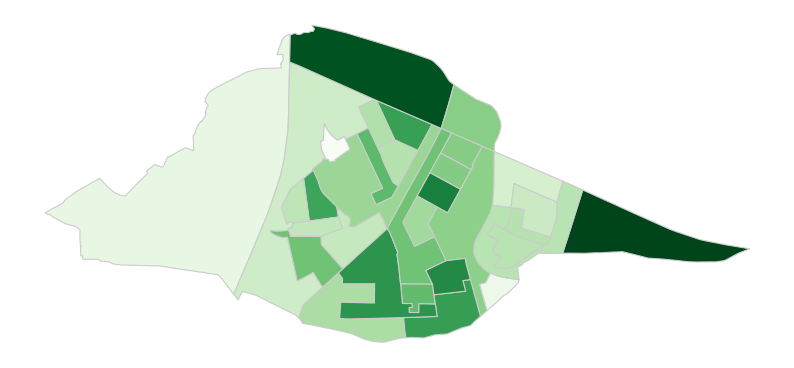

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

variable = '일별쓰레기배출량'

# 범위 설정
vmin, vmax = jangdae_new_gdf[variable].min(), jangdae_new_gdf[variable].max()

# Plot 생성
fig, ax = plt.subplots(1, figsize=(10, 6))

# GeoDataFrame을 시각화, legend=False로 기본 범례 제거
jangdae_new_gdf.plot(column=variable, cmap='Greens', linewidth=0.8, ax=ax, edgecolor='0.8', legend=False, alpha=1)

# 축 제거
ax.axis('off')

# 지도 저장
plt.savefig("/content/drive/MyDrive/시각화파일/jangdae_block.png", dpi=800, bbox_inches='tight', pad_inches=0)

# 지도 출력
plt.show()

In [ ]:
# CSV 파일 경로
file_path_ = '/content/drive/MyDrive/유성구 데이터/유성구_공동주택_현황_위경도.csv'

# CSV 파일 읽기
apart_df = pd.read_csv(file_path_)

# 데이터프레임 확인
apart_df

,NAME,ADDRESS,_X,_Y
0,원자력연료사원아파트,대전광역시 유성구 도룡동 392-2,127.375911,36.384128
1,우성아파트,대전광역시 유성구 도룡동 383-3,127.381123,36.388177
2,연구원 현대아파트,대전광역시 유성구 도룡동 431-6,127.376720,36.383006
3,과기원교수아파트,대전광역시 유성구 도룡동 383-2,127.380333,36.388100
4,삼정하이츠아파트,대전광역시 유성구 구암동 600-2,127.331722,36.353420
...,...,...,...,...
244,호반써밋유성그랜드파크1단지,대전광역시 유성구 용산동 371-4,127.391040,36.416978
245,호반써밋유성그랜드파크3단지,대전광역시 유성구 용산동 391-2,127.395640,36.413690
246,원플러스(One Plus),대전광역시 유성구 봉명동 666-3,127.351980,36.358377
247,크레타하임,대전광역시 유성구 도룡동 385-21,127.379677,36.385815


In [ ]:
# 'ADDRESS' 열에 '장대동'이 포함된 행만 필터링합니다.
jangdae_apart_df = apart_df[apart_df['ADDRESS'].str.contains('장대동')]

# 필터링된 데이터프레임을 새로운 변수에 저장합니다.
jangdae_apart_df

,NAME,ADDRESS,_X,_Y
11,광선연립,대전광역시 유성구 장대동 265-1,127.332431,36.359674
43,월드컵패밀리타운,대전광역시 유성구 장대동 323-2,127.336213,36.363779
44,드림월드,대전광역시 유성구 장대동 344,127.338536,36.362668
46,아름아파트,대전광역시 유성구 장대동 286-10,127.338489,36.357339
50,갤러리빌3,대전광역시 유성구 장대동 283-3,127.336809,36.358345
67,성원상떼빌,대전광역시 유성구 장대동 376-2,127.340560,36.358308
74,한일유엔아이,대전광역시 유성구 장대동 382,127.333265,36.363669
80,아이빌,대전광역시 유성구 장대동 284-2,127.337012,36.357671
87,갤러리빌2,대전광역시 유성구 장대동 283-4,127.337099,36.358346
101,장대 푸르지오,대전광역시 유성구 장대동 479,127.332049,36.361579


In [ ]:
import folium
from folium import Choropleth, LayerControl, GeoJson
import pandas as pd
import geopandas as gpd

# 법정동별 상권 수 집계

# 지도 중심부 설정 (대전 유성구)
center = [36.3668, 127.3451]

# 기본 지도 생성
m = folium.Map(location=center, zoom_start=12, tiles='CartoDB positron')

# Choropleth 레이어 추가
Choropleth(
    geo_data=jangdae_new_gdf.to_json(),
    data=jangdae_new_gdf,
    columns=['집계구번호', '일별쓰레기배출량'],
    key_on='feature.properties.집계구번호',
    fill_color='Greens',
    fill_opacity=0.4,
    line_opacity=0.5,
    legend_name='값',

).add_to(m)

for _, row in jangdae_apart_df.iterrows():
    folium.Circle(
        location=[row['_Y'], row['_X']],
        radius=100,  # 반경 설정 (미터 단위)
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.2,
        tooltip=f"주소: {row['ADDRESS']}"  # 마커에 표시될 툴팁
    ).add_to(m)


# 법정동별 이름 추가 (텍스트로 표시)
for _, row in jangdae_new_gdf.iterrows():
    # 법정동의 중심 좌표 계산 (Polygon의 centroid)
    centroid = row['geometry'].centroid
    lat, lon = centroid.y, centroid.x

    # # 텍스트를 DivIcon으로 추가
    # folium.Marker(
    #     location=[lat, lon],
    #     tooltip=row['집계구번호']
    # ).add_to(m)

# 레이어 컨트롤 추가
LayerControl().add_to(m)

# 지도 저장 및 출력
m.save('/content/drive/MyDrive/시각화파일/html법정동별 지도/jangdae_block1.html')
m